## Hypothesis
To predict the incentive level requested to program dishwasher after 11pm
    
IV: Age, Gender, OwnRent, SqftCate, HouseholdS, Political, Ethnic, Income, Educ
    Latitude, HomeS, EnergyC, MC, ComfNS, HabitC, Summer_avg, Winter_avg


In [162]:
options(digits=2);
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);
#populate missing values
#survey$IncHomeS[survey$IncHomeS==99] = NA;
#survey$IncHomeS[survey$IncHomeS==999] = NA;

#survey <- survey[survey$HomeS>60,];
#survey <- survey[survey$HomeS<80,];

#survey <- survey[survey$HomeW>60,];
#survey <- survey[survey$HomeW<80,];

data <- survey[,-c(1:7)];

#We investigate only use people who use A/C when being at home in summer
data1 <- data[data$HomeSYN==1,-which(names(data) %in% c("HomeWYN","AwayWNY","HomeSYN","AwaySNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Attitude","Trust","MCG","Frugal","ComfortS","ComfortW","SubN","ACYN","HeatYN",
    "Longitude", "Job","hot","cold"))];

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       3       4       4       6       7     183 


  1   2   3   4   5   6   7 
 51  53  64 121  37 118  35 

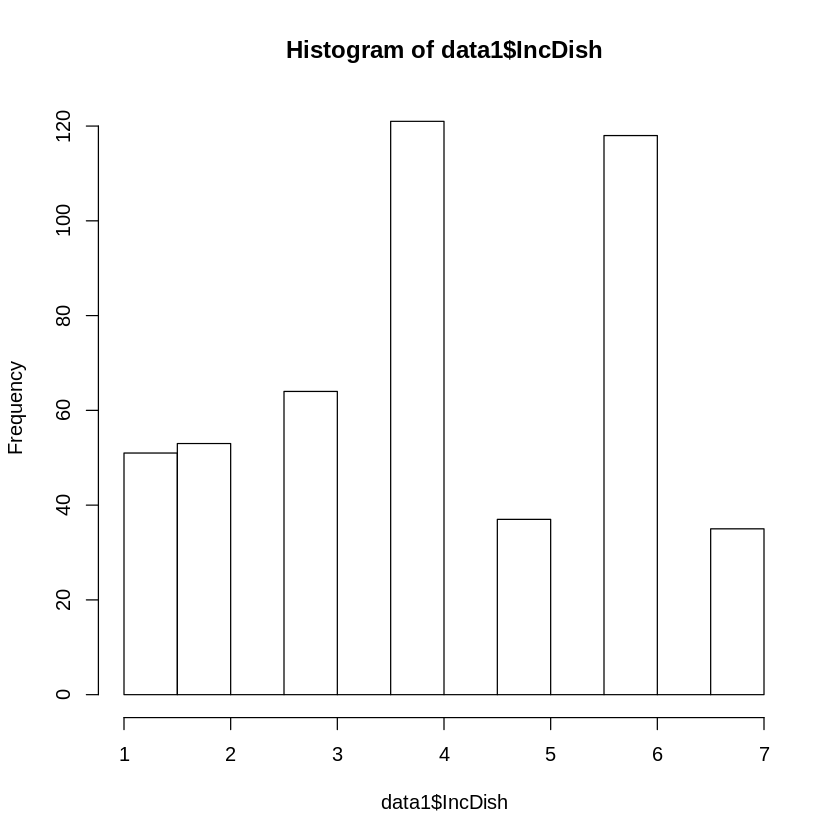

In [163]:
summary(data1$IncDish)
table(data1$IncDish)
hist(data1$IncDish)

In [164]:
#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

[1] "HomeW" "28"   
[1] "AwayW" "87"   
[1] "AwayS" "101"  
[1] "IncWD" "56"   
[1] "IncDish" "183"    
[1] "Age" "4"  
[1] "Income" "3"     
[1] "Educ" "5"   
[1] "Latitude" "21"      
[1] "Summer_avgF" "33"         
[1] "Winter_avgF" "33"         
[1] "Summer_avgC" "33"         
[1] "Winter_avgC" "33"         
[1] "Summer_avg" "33"        
[1] "Winter_avg" "33"        


In [165]:
#lets remover these
data2 <- data1[,-which(names(data1) %in% c("HomeW","AwayW",
                    "AwayS","IncWD"))];
print(dim(data2))
data2 <- na.omit(data2)
print(dim(data2))
#table(data2$Political)

[1] 662 106
[1] 436 106


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     3.0     4.0     4.1     6.0     7.0 


  1   2   3   4   5   6   7 
 46  49  58 115  32 106  30 

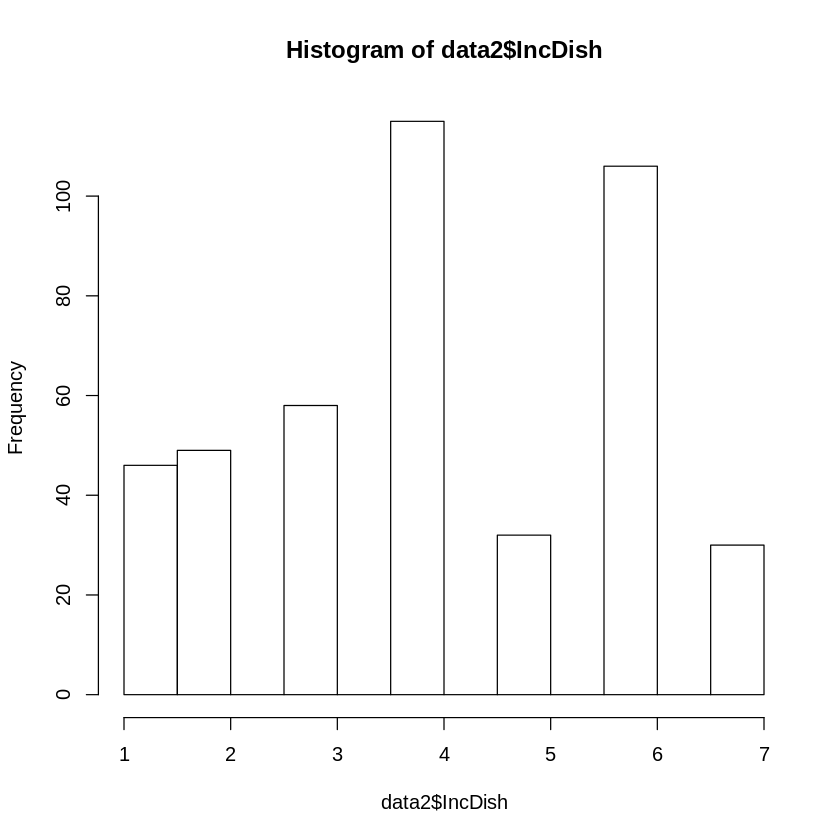

In [166]:
summary(data2$IncDish)
table(data2$IncDish)
hist(data2$IncDish)

In [167]:
sort(names(data2))

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "BillS"       "BillW"       "CashYN"      "ComfNS"     
 [11] "ComfNS1"     "ComfNS2"     "ComfNS3"     "ComfNW"      "ComfNW1"    
 [16] "ComfNW2"     "ControlN1"   "ControlN2R"  "ControlN3"   "ControlN4"  
 [21] "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"      "Educ"       
 [26] "EmerRForm"   "EnergyC"     "EnergyC1"    "EnergyC2"    "EnergyC3"   
 [31] "EnergyC4"    "Ethnic"      "Frugal1"     "Frugal2"     "Frugal3"    
 [36] "Gender"      "HabitC"      "HabitC1"     "HabitC2"     "HabitC3"    
 [41] "HabitC4"     "HabitC5"     "HabitC6"     "HabitC7"     "HabitE1"    
 [46] "HabitE2"     "HabitE3"     "HabitG"      "HomeS"       "HouseholdS" 
 [51] "INT1"        "INT2"        "INT3"        "INT4"        "IncAutoS"   
 [56] "IncAutoW"    "IncAwayS"    "IncAwayW"    "IncDish"     "IncEmer10S" 
 [61] "IncEmer10W"  "IncEmer30S"  "IncEmer30W"  "IncHomeS"    "IncHomeW"   
 [66] "Income"      "Latitude"    "MC"          "MC1"         "MC2"        
 [71] "MC3"         "MC4"         "MC5"         "MCBill"      "OwnRent"    
 [76] "PBC"         "PBC1"        "PBC2"        "PBC3R"       "PBC4"       
 [81] "PBC5"        "Political"   "RewardForm"  "SN"          "SN1"        
 [86] "SN2"         "SN3"         "SN4"         "Sqft"        "SqftCate"   
 [91] "State"       "SubNorm"     "SubNorm1"    "SubNorm2"    "SubNorm3"   
 [96] "Summer_avg"  "Summer_avgC" "Summer_avgF" "Trust1"      "Trust2"     
[101] "Trust3"      "Trust4"      "Winter_avg"  "Winter_avgC" "Winter_avgF"
[106] "X.9to5"

In [168]:
#names(data2)
#These are only variables we really care about
IVS = IVS = c("Age",
"Gender",
"OwnRent",
"SqftCate",
"HouseholdS",
"Political",
"Income",
"Educ",
"MC",
"EnergyC",
"PBC",
"SubNorm",
"HabitC",
"HabitG",
"ConvB1",
"CashYN")

In [169]:
sort(names(data2))
paste(sort(IVS))

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "BillS"       "BillW"       "CashYN"      "ComfNS"     
 [11] "ComfNS1"     "ComfNS2"     "ComfNS3"     "ComfNW"      "ComfNW1"    
 [16] "ComfNW2"     "ControlN1"   "ControlN2R"  "ControlN3"   "ControlN4"  
 [21] "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"      "Educ"       
 [26] "EmerRForm"   "EnergyC"     "EnergyC1"    "EnergyC2"    "EnergyC3"   
 [31] "EnergyC4"    "Ethnic"      "Frugal1"     "Frugal2"     "Frugal3"    
 [36] "Gender"      "HabitC"      "HabitC1"     "HabitC2"     "HabitC3"    
 [41] "HabitC4"     "HabitC5"     "HabitC6"     "HabitC7"     "HabitE1"    
 [46] "HabitE2"     "HabitE3"     "HabitG"      "HomeS"       "HouseholdS" 
 [51] "INT1"        "INT2"        "INT3"        "INT4"        "IncAutoS"   
 [56] "IncAutoW"    "IncAwayS"    "IncAwayW"    "IncDish"     "IncEmer10S" 
 [61] "IncEmer10W"  "IncEmer30S"  "IncEmer30W"  "IncHomeS"    "IncHomeW"   
 [66] "Income"      "Latitude"    "MC"          "MC1"         "MC2"        
 [71] "MC3"         "MC4"         "MC5"         "MCBill"      "OwnRent"    
 [76] "PBC"         "PBC1"        "PBC2"        "PBC3R"       "PBC4"       
 [81] "PBC5"        "Political"   "RewardForm"  "SN"          "SN1"        
 [86] "SN2"         "SN3"         "SN4"         "Sqft"        "SqftCate"   
 [91] "State"       "SubNorm"     "SubNorm1"    "SubNorm2"    "SubNorm3"   
 [96] "Summer_avg"  "Summer_avgC" "Summer_avgF" "Trust1"      "Trust2"     
[101] "Trust3"      "Trust4"      "Winter_avg"  "Winter_avgC" "Winter_avgF"
[106] "X.9to5"

[1] "Age"        "CashYN"     "ConvB1"     "Educ"       "EnergyC"   
 [6] "Gender"     "HabitC"     "HabitG"     "HouseholdS" "Income"    
[11] "MC"         "OwnRent"    "PBC"        "Political"  "SqftCate"  
[16] "SubNorm"

In [170]:
data1 <- data2[, which(names(data2) %in% c("IncDish",IVS))];
sort(names(data1))

[1] "Age"        "CashYN"     "ConvB1"     "Educ"       "EnergyC"   
 [6] "Gender"     "HabitC"     "HabitG"     "HouseholdS" "IncDish"   
[11] "Income"     "MC"         "OwnRent"    "PBC"        "Political" 
[16] "SqftCate"   "SubNorm"

In [171]:
#Check to see if there are anymore missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

In [172]:
#names(data1)

#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}
    
    
# What about high correlations?
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}
#hiCor(data1,.75)

In [173]:
data2 <- data1;
data2 <- na.omit(data2)
names(data2)

[1] "IncDish"    "ConvB1"     "Age"        "Gender"     "OwnRent"   
 [6] "SqftCate"   "HouseholdS" "Political"  "Income"     "Educ"      
[11] "EnergyC"    "PBC"        "CashYN"     "MC"         "SubNorm"   
[16] "HabitG"     "HabitC"

In [174]:
#Check to see if there are anymore missing values
for (n in names(data2)){
    nmis = sum(is.na(data2[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data2[,n]))))
}

In [175]:
hiCor(data2,.7)

<0 x 0 matrix>

In [176]:
res<-prcomp(data2, retx=F,scale=T)$rotation[,1:15];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2)

for (i in 1:15){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}


[1] 0.16
    ConvB1 EnergyC   PBC   MC SubNorm HabitG HabitC
PC1   0.42   -0.35 -0.32 -0.4   -0.33  -0.37  -0.29
[1] 0.29
      Age OwnRent SqftCate HouseholdS Income
PC2 -0.39   -0.51    -0.53      -0.26  -0.39
[1] 0.37
    IncDish Gender HouseholdS Political Income Educ SubNorm
PC3    0.33   0.24       0.37     -0.23  -0.28 -0.6   -0.23
[1] 0.45
    Gender Political EnergyC HabitG HabitC
PC4    0.5      0.53    0.43  -0.26  -0.35
[1] 0.51
    IncDish  Age HouseholdS Political
PC5    0.58 0.51      -0.45      0.24
[1] 0.57
     Educ CashYN HabitC
PC6 -0.21  -0.86   0.22
[1] 0.63
    ConvB1 Gender Political Income   PBC SubNorm
PC7   0.35   0.35      -0.4  -0.23 -0.46    0.46
[1] 0.68
    IncDish  Age HouseholdS  Educ   PBC CashYN SubNorm HabitG
PC8   -0.57 0.33       -0.3 -0.25 -0.33   0.31   -0.22   0.23
[1] 0.73
    Political  Educ   PBC CashYN    MC HabitG HabitC
PC9      0.39 -0.32 -0.29   0.27 -0.37   0.24   0.53
[1] 0.77
     ConvB1 Gender Educ EnergyC SubNorm HabitG HabitC
PC10

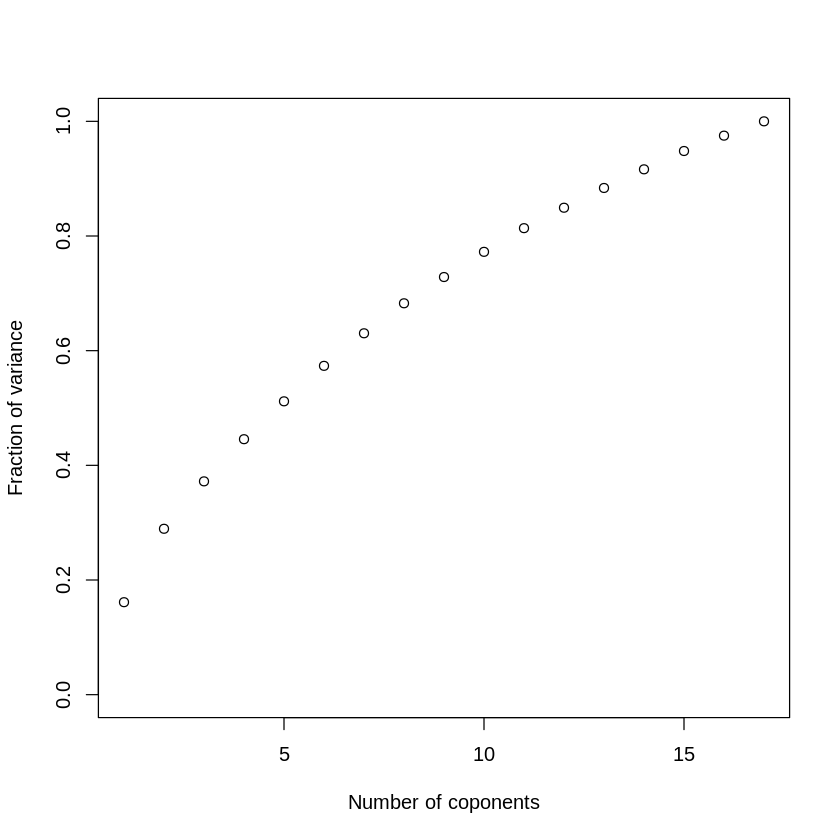

In [177]:
plot(1:dim(data2)[2],cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");

In [178]:
res <- c();
vnam <- names(data2);
for (i in 2:dim(data2)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}

In [179]:
row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[o,][res[o,2]<.7,]

SqftCate,6,0.38
ConvB1,2,0.34
OwnRent,5,0.32
MC,14,0.31
EnergyC,11,0.27
HabitG,16,0.24
Income,9,0.23
SubNorm,15,0.23
HouseholdS,7,0.21
Age,3,0.20
HabitC,17,0.19


In [180]:
IndepPred <- row.names(res[o,][res[o,2]<.7,])

In [186]:
#IndepPred = c('Atti', 'EnergyC', 'SqftCate', 'OwnRent', 'MC', 'HouseholdS', 'Income', 'SubNorm', 'HabitC', 'Educ', 'PBC', 'Political', 'Gender', 'ComfNS', 'Latitude', 'Ethnic')
IndepPred = c("Age","Gender","SqftCate","OwnRent","Income","Educ","MC","EnergyC","PBC","SubNorm","HabitC","ConvB1")
fmla <- as.formula(paste("IncDish",paste(IndepPred,collapse="+"),sep="~"));

In [187]:
table(data2[,"IncDish"])


  1   2   3   4   5   6   7 
 46  49  58 115  32 106  30 

In [188]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.189 -1.258  0.014  1.466  3.729 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   2.5026     1.0038    2.49   0.0130 * 
Age           0.0248     0.0083    2.99   0.0029 **
Gender        0.2617     0.1772    1.48   0.1405   
SqftCate      0.1241     0.0940    1.32   0.1877   
OwnRent      -0.1328     0.1960   -0.68   0.4984   
Income       -0.0815     0.0504   -1.62   0.1066   
Educ         -0.0141     0.0818   -0.17   0.8632   
MC            0.1067     0.0921    1.16   0.2469   
EnergyC      -0.1648     0.0660   -2.50   0.0130 * 
PBC           0.1514     0.1002    1.51   0.1315   
SubNorm      -0.0232     0.0690   -0.34   0.7374   
HabitC       -0.0363     0.0657   -0.55   0.5813   
ConvB1        0.1153     0.0829    1.39   0.1654   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.8 on 423 degrees of freedom
Multiple R

In [189]:
IndepPred = c("Age","Gender","OwnRent","SqftCate","Income","Educ","MC","EnergyC","PBC","SubNorm","HabitC","ConvB1","CashYN")
fmla <- as.formula(paste("IncDish",paste(IndepPred,collapse="+"),sep="~"));

In [190]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.197 -1.279  0.035  1.470  3.719 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  2.30218    1.04511    2.20   0.0281 * 
Age          0.02452    0.00832    2.95   0.0034 **
Gender       0.26456    0.17735    1.49   0.1365   
OwnRent     -0.12064    0.19688   -0.61   0.5404   
SqftCate     0.12551    0.09410    1.33   0.1830   
Income      -0.08292    0.05045   -1.64   0.1010   
Educ        -0.01496    0.08185   -0.18   0.8550   
MC           0.10275    0.09229    1.11   0.2662   
EnergyC     -0.16602    0.06610   -2.51   0.0124 * 
PBC          0.15101    0.10025    1.51   0.1327   
SubNorm     -0.02343    0.06909   -0.34   0.7346   
HabitC      -0.03383    0.06584   -0.51   0.6077   
ConvB1       0.11806    0.08310    1.42   0.1561   
CashYNTRUE   0.22379    0.32230    0.69   0.4878   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual stan